In [19]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from lime.lime_tabular import LimeTabularExplainer
from sklearn.ensemble import RandomForestClassifier
from sklearn.manifold import TSNE
from sklearn.preprocessing import OneHotEncoder
from lime import lime_tabular
from sklearn.model_selection import train_test_split

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import *
from sklearn.impute import *
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import *
from deap import base, creator, tools, algorithms
from datetime import datetime
from sklearn.svm import SVC
import warnings
import numpy as np
import random

In [20]:
df = pd.read_csv("arrhythmia.csv", header=None).replace("?", np.nan)
data = df.to_numpy()
x, y = data[:, :-1], data[:, -1]
y = pd.Series(y).apply(str)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)
values = df.iloc[:, -1].values

# Calcula as estatísticas
print("Máximo =", np.max(values),
  "Mínimo =", np.min(values),
  "Média =", np.mean(values),
  "Mediana =", np.median(values),
  "Desvio Padrão =", np.std(values))

Máximo = 16 Mínimo = 1 Média = 3.8805309734513274 Mediana = 1.0 Desvio Padrão = 4.402219038329423


In [21]:
x_train

array([[18, 0, 175, ..., 1.4, 17.1, 29.7],
       [33, 0, 168, ..., 1.2, 18.7, 33.5],
       [67, 1, 165, ..., 1.6, 40.8, 50.7],
       ...,
       [25, 1, 162, ..., 0.6, 22.6, 25.2],
       [34, 1, 165, ..., 0.8, 1.9, 8.1],
       [44, 0, 179, ..., 0.4, 14.4, 18.2]], dtype=object)

In [22]:
encoder = OneHotEncoder()
encoder.fit(x_train)
encoded_train = encoder.transform(x_train)
rf = RandomForestClassifier()
rf.fit(encoded_train, y_train)

encoded_train

<361x13503 sparse matrix of type '<class 'numpy.float64'>'
	with 100719 stored elements in Compressed Sparse Row format>

In [23]:
df = pd.read_csv("resultados_AdaBoost_SEED_13.csv")
df.head(5)

,strategy,k,n_estimators,learning_rate,f1,elapsed_time
0,median,218,71,97,0.065720,0.169930
1,median,133,1,21,0.466475,0.080757
2,median,133,71,2,0.418493,1.354163
3,most_frequent,73,46,51,0.044444,0.673185
4,mean,93,91,50,0.029630,1.440981


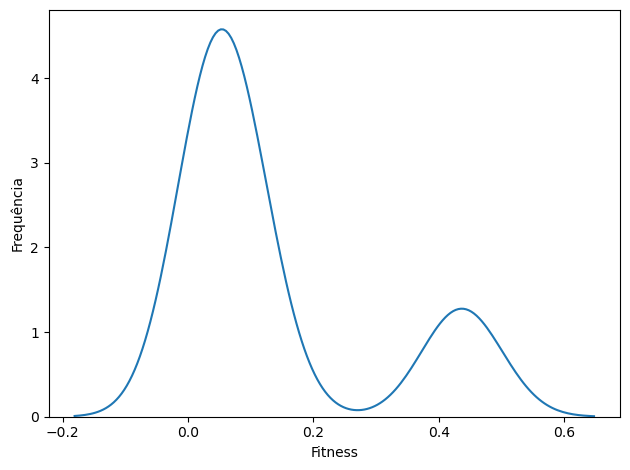

In [24]:
fig, ax = plt.subplots()
sns.kdeplot(df, x="f1", ax=ax)
ax.set_ylabel("Frequência")
ax.set_xlabel("Fitness")
fig.tight_layout()

<Axes: xlabel='elapsed_time', ylabel='Density'>

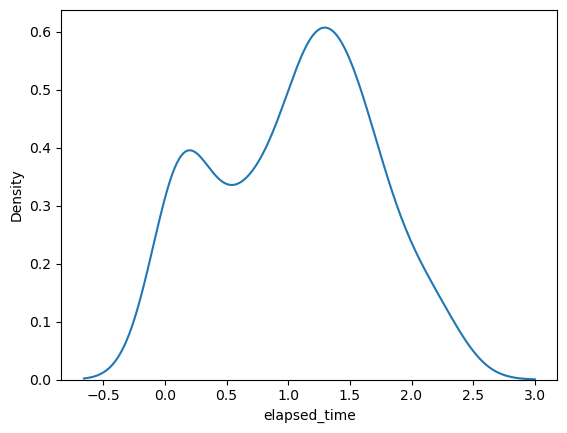

In [25]:
sns.kdeplot(df, x="elapsed_time")

In [26]:
X = df.to_numpy()[:, :-2]
y = df["f1"].astype(float)

df.head(5)

,strategy,k,n_estimators,learning_rate,f1,elapsed_time
0,median,218,71,97,0.065720,0.169930
1,median,133,1,21,0.466475,0.080757
2,median,133,71,2,0.418493,1.354163
3,most_frequent,73,46,51,0.044444,0.673185
4,mean,93,91,50,0.029630,1.440981


In [27]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(X)
X_encoded = enc.transform(X).toarray()

X_encoded

array([[0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.]])

In [28]:
#t-SNE
x_embedded = TSNE(n_components=2).fit_transform(X_encoded)

x_embedded[:10]

array([[ -7.325129  ,  -1.9508983 ],
       [ -5.3290157 ,  -6.95236   ],
       [-12.550351  ,  -1.2844576 ],
       [ -2.7398086 ,   5.2766705 ],
       [ 10.85781   ,   7.9726615 ],
       [  7.4908924 ,  -8.434468  ],
       [ 11.01706   ,  -0.6116281 ],
       [ -0.04977649, -11.794461  ],
       [  6.2172565 ,  12.315062  ],
       [-10.077808  ,  -9.023874  ]], dtype=float32)

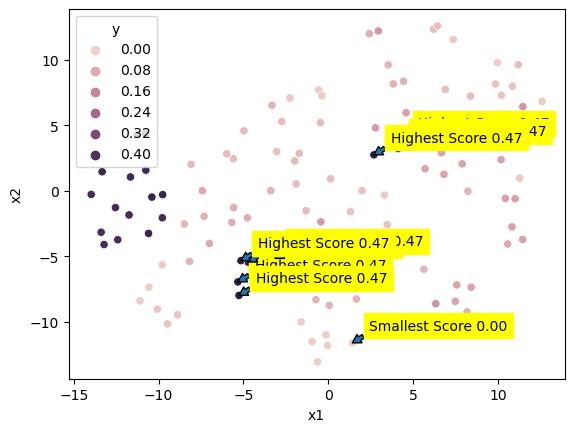

In [29]:
x_embedded_f1 = np.column_stack((x_embedded, df['f1']))
_df = pd.DataFrame(data=x_embedded_f1, columns=["x1", "x2", "y"])
_df.head(5)
ax = sns.scatterplot(data=_df, x="x1", y="x2", hue="y")

# plot highest fitness
coord = _df.loc[_df["y"] == _df["y"].max()]
for i, row in coord.iterrows():
    x, y = row["x1"], row["x2"]
    ax.annotate(f"Highest Score {row['y']:>.2f}", (x, y), (x+1, y+1), arrowprops={"width": 3, "headwidth": 7, "headlength": 6}, backgroundcolor="yellow")

# plot lowest fitness
coord = _df.loc[_df["y"] == _df["y"].min()]
for i, row in coord.iterrows():
    x, y = row["x1"], row["x2"]
    ax.annotate(f"Smallest Score {row['y']:>.2f}", (x, y), (x+1, y+1), arrowprops={"width": 3, "headwidth": 7, "headlength": 6}, backgroundcolor="yellow")

In [30]:
df.loc[df.f1 == df.f1.max()]

,strategy,k,n_estimators,learning_rate,f1,elapsed_time
1,median,133,1,21,0.466475,0.080757
21,median,133,1,97,0.466475,0.077384
28,median,243,1,21,0.466475,0.100654
59,median,133,1,51,0.466475,0.075088
99,mean,93,1,51,0.466475,0.066689
101,median,133,1,97,0.466475,0.074183
102,mean,93,1,51,0.466475,0.064734
104,mean,133,1,51,0.466475,0.067155


In [31]:
# Exibe os resultados
print("Max da coluna 'f1' SEED 13:", df.f1.max())
print("Média da coluna 'f1' SEED 13:", df['f1'].mean())
print("Média da coluna 'elapsed_time' SEED 13:", df['elapsed_time'].mean())

Max da coluna 'f1' SEED 13: 0.4664754706453156
Média da coluna 'f1' SEED 13: 0.13396464067243855
Média da coluna 'elapsed_time' SEED 13: 1.0486052459016395


In [32]:
df = pd.read_csv("resultados_AdaBoost_SEED_47.csv")

# Exibe os resultados
print("Max da coluna 'f1' SEED 47:", df.f1.max())
print("Média da coluna 'f1': SEED 47", df['f1'].mean())
print("Média da coluna 'elapsed_time' SEED 47:", df['elapsed_time'].mean())

Max da coluna 'f1' SEED 47: 0.3983534544422058
Média da coluna 'f1': SEED 47 0.2635624547998891
Média da coluna 'elapsed_time' SEED 47: 0.7086253252032522


In [36]:
df = pd.read_csv("resultados_AdaBoost_SEED_89.csv")

# Exibe os resultados
print("Max da coluna 'f1' SEED 89:", df.f1.max())
print("Média da coluna 'f1': SEED 89", df['f1'].mean())
print("Média da coluna 'elapsed_time' SEED 89:", df['elapsed_time'].mean())

Max da coluna 'f1' SEED 89: 0.3774620131965669
Média da coluna 'f1': SEED 89 0.1719812032661573
Média da coluna 'elapsed_time' SEED 89: 0.5411366991150443


In [37]:
df = pd.read_csv("resultados_AdaBoost_Padrao.csv")

# Exibe os resultados
print("Max da coluna 'f1' Padrao:", df.f1.max())
print("Média da coluna 'f1': Padrao", df['f1'].mean())
print("Média da coluna 'elapsed_time' Padrao:", df['elapsed_time'].mean())

Max da coluna 'f1' Padrao: 0.4319927567418032
Média da coluna 'f1': Padrao 0.422451444670416
Média da coluna 'elapsed_time' Padrao: 0.47751284821428575


In [34]:
df = pd.read_csv("resultados_AdaBoost_3.csv")
print("Max da coluna 'f1':", df.f1.max())
print("Média da coluna 'f1':", df['f1'].mean())
print("Média da coluna 'elapsed_time':", df['elapsed_time'].mean())

Max da coluna 'f1': 0.4441721329211795
Média da coluna 'f1': 0.2276479995445152
Média da coluna 'elapsed_time': 0.859165606557377


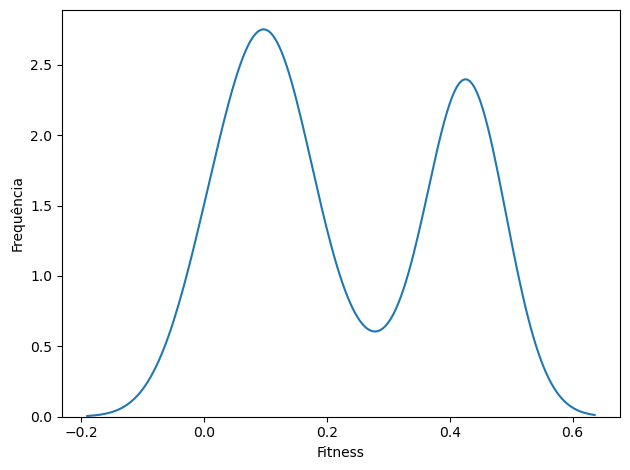

In [35]:
fig, ax = plt.subplots()
sns.kdeplot(df, x="f1", ax=ax)
ax.set_ylabel("Frequência")
ax.set_xlabel("Fitness")
fig.tight_layout()

<Axes: xlabel='elapsed_time', ylabel='Density'>

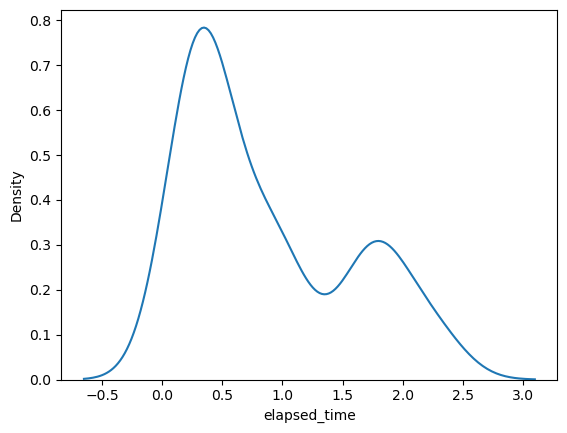

In [18]:
sns.kdeplot(df, x="elapsed_time")

C:\Users\maria\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


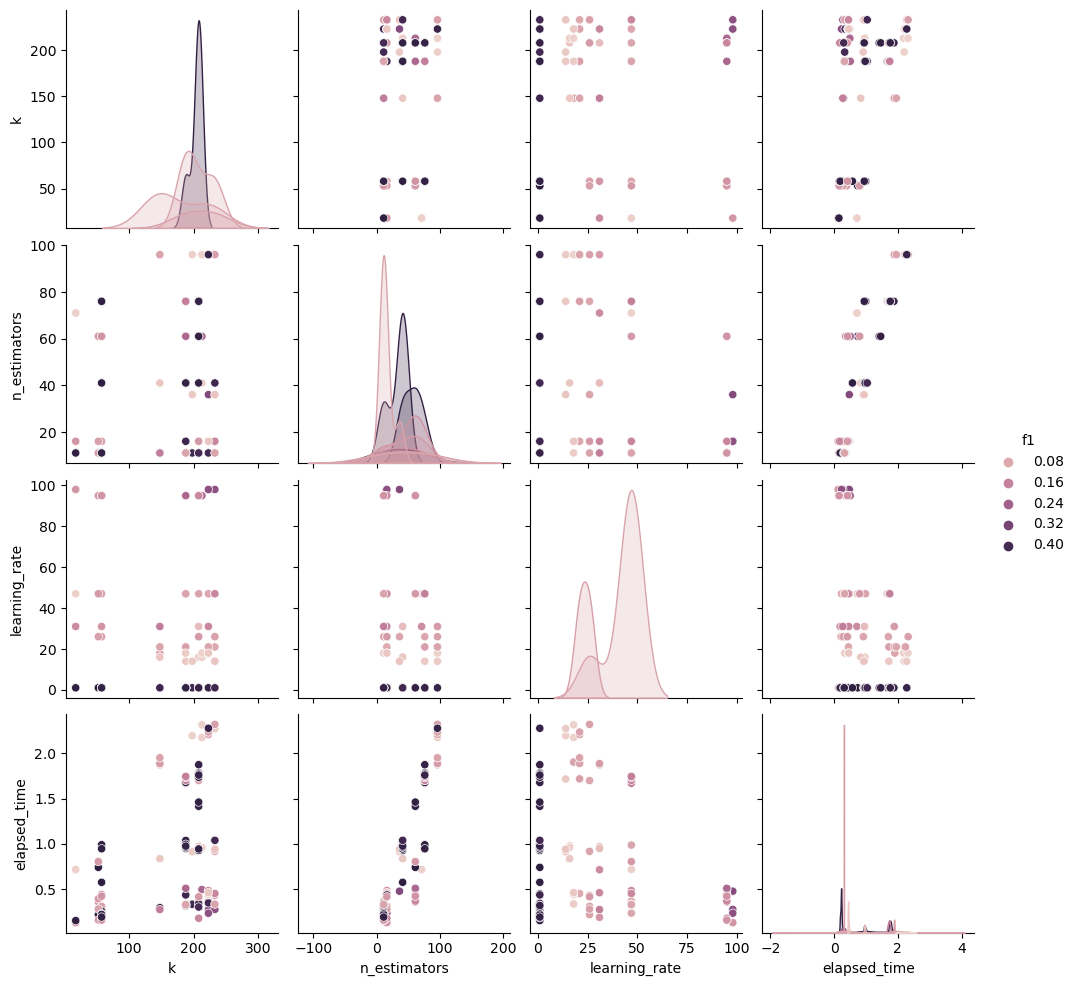

In [19]:
#df.f1.value_counts()

sns.pairplot( df, hue="f1" )

In [20]:
X = df.to_numpy()[:, :-2]
y = df["f1"].astype(float)

df.head(5)

,strategy,k,n_estimators,learning_rate,f1,elapsed_time
0,most_frequent,188,76,47,0.167646,1.730835
1,mean,198,96,14,0.004444,2.196143
2,mean,18,71,31,0.139788,0.711976
3,mean,53,61,95,0.113495,0.354872
4,most_frequent,148,96,21,0.091199,1.895108


In [21]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(X)
X_encoded = enc.transform(X).toarray()

X_encoded

array([[0., 1., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.]])

In [22]:
#t-SNE
x_embedded = TSNE(n_components=2).fit_transform(X_encoded)

x_embedded[:10]

array([[   7.303777 ,  -10.165019 ],
       [-102.96583  ,   -1.8207074],
       [ -83.80345  ,   26.97678  ],
       [ -80.47772  ,   75.87586  ],
       [ -57.996384 ,  -43.352894 ],
       [  23.960524 ,  -67.68687  ],
       [  72.50893  ,   30.802105 ],
       [ -89.3483   ,  -27.709333 ],
       [ -16.039309 ,  115.70406  ],
       [  -0.89346  , -102.890724 ]], dtype=float32)

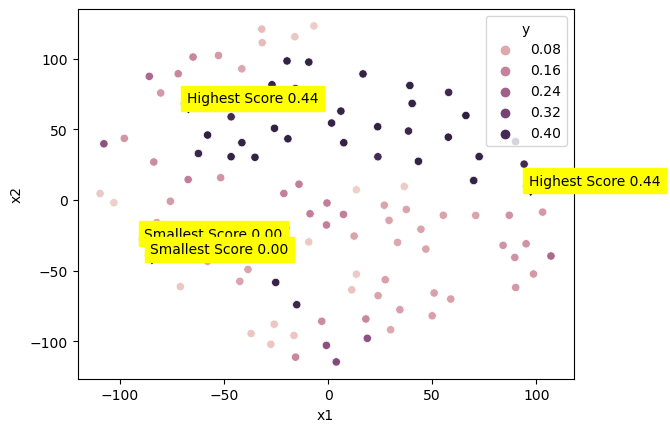

In [23]:
x_embedded_f1 = np.column_stack((x_embedded, df['f1']))
_df = pd.DataFrame(data=x_embedded_f1, columns=["x1", "x2", "y"])
_df.head(5)
ax = sns.scatterplot(data=_df, x="x1", y="x2", hue="y")

# plot highest fitness
coord = _df.loc[_df["y"] == _df["y"].max()]
for i, row in coord.iterrows():
    x, y = row["x1"], row["x2"]
    ax.annotate(f"Highest Score {row['y']:>.2f}", (x, y), (x+1, y+1), arrowprops={"width": 3, "headwidth": 7, "headlength": 6}, backgroundcolor="yellow")

# plot lowest fitness
coord = _df.loc[_df["y"] == _df["y"].min()]
for i, row in coord.iterrows():
    x, y = row["x1"], row["x2"]
    ax.annotate(f"Smallest Score {row['y']:>.2f}", (x, y), (x+1, y+1), arrowprops={"width": 3, "headwidth": 7, "headlength": 6}, backgroundcolor="yellow")

In [24]:
df.loc[df.f1 == df.f1.max()]

,strategy,k,n_estimators,learning_rate,f1,elapsed_time
17,most_frequent,53,11,1,0.444172,0.215895
24,mean,53,61,1,0.444172,0.738641


In [25]:
# Exibe os resultados
print("Média da coluna 'f1':", df['f1'].mean())
print("Média da coluna 'elapsed_time':", df['elapsed_time'].mean())

Média da coluna 'f1': 0.2276479995445152
Média da coluna 'elapsed_time': 0.859165606557377


In [38]:
df_X = pd.read_csv("arrhythmia.csv", header=None).replace("?", np.nan)
df_X.shape

(452, 280)

In [ ]:
RANDOM_STATE = 42

df_X = pd.read_csv("arrhythmia.csv", names=list(map(lambda X: f"col_{X}", range(280)))).replace("?", np.nan)
data = df_X.to_numpy()
X, y = data[:, :-1], data[:, -1]
X = X.astype(float)
y = pd.Series(y).astype(float)

preprocess = Pipeline([
        ('imputer', SimpleImputer(strategy="most_frequent"))])

pipeline = pipe = Pipeline([
        ('imputer', SimpleImputer(strategy="most_frequent")),
        ('scaler', StandardScaler()),
        ('feature-selection', SelectKBest(k=53)),
        ('adaBoost', AdaBoostClassifier(
            n_estimators=11,
            learning_rate=1,
            random_state=RANDOM_STATE))])

pipeline.fit(X, y)
X = preprocess.fit_transform(X, y)
class_ = pipeline.classes_
y_pred = pipeline.predict(X)

explainer = LimeTabularExplainer(X,
                                 feature_names=df_X.columns[:-1],
                                 class_names=class_)

for i, (y, yp) in enumerate(zip(y, y_pred)):
    if y == yp:
        print(f"classe real: {y}, predição: {yp}")
        exp = explainer.explain_instance(X[i], pipeline.predict_proba)
        exp.show_in_notebook(show_table=True, show_all=False)

In [ ]:
#cria uma imagem 3D
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

X = x_embedded_f1[:, 0]
Y = x_embedded_f1[:, 1]
Z = x_embedded_f1[:, 2]

#Arredondar os valores de X, Y e Z
X = np.round(X, 2)
Y = np.round(Y, 2)
Z = np.round(Z, 2)

ax.plot_trisurf(Y, X, Z, cmap='viridis', linewidth=0.2)
ax.view_init(20, 75)

plt.show()

In [ ]:
#cria uma imagem 2D que mostre o Z evidente
fig = plt.figure()
ax = fig.add_subplot()

X = x_embedded_f1[:, 0]
Y = x_embedded_f1[:, 1]
Z = x_embedded_f1[:, 2]

#Arredondar os valores de X, Y e Z
X = np.round(X, 2)
Y = np.round(Y, 2)
Z = np.round(Z, 2)

scatter = ax.scatter(X, Y, c=Z, cmap='viridis', linewidth=0.2)

#Definir os rótulos dos eixos
ax.set_xlabel('Eixo X')
ax.set_ylabel('Eixo Y')

# Adicione uma barra de cores
cbar = plt.colorbar(scatter)
cbar.set_label('Valores de Z')

plt.show()